In [ ]:


#Based on searches using pre-established keyword sets, how and when do women talk about issues of sexual assault / harassment / abuse in oral histories? 
#Capture term frequency and relative term frequency overall and per collection? 

#GOAL: Generate Stats on False and True Hits for keywords
#KEYWORDS: 
#anti-rape
#sodomy [can look at the 8 to see if coercive]
#ladies man (combine all variants in one category – any true hits?)
#abusive (N-159, presume false hits)
#playboy [mostly Playboy mag/club if false hits included
#insult, outrage [may go into group a., depending on false hits]  

#Anita Hill VS Clarence Thomas (productivity) 

#tdlr: negative response, only show one version 
#Run Keywords through all coded text  



#TO DO: 

#productivity of keywords 
#VISUALIZATION OF PRODUCTIVITY 
#visualization of false and true hits for each keyword 

#METADATA  

#frequency visualizations 


In [157]:
import os 
import pandas 
import re 
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [13]:
nvivo_extracts_with_nodes = os.path.join("Desktop", "event_extents_with_nodes.csv")
rq1_df = pandas.read_csv(nvivo_extracts_with_nodes)
rq1_df 

,Coded Text,coder,modified time,collection_id,name,any_needs_review,event_extent,initiating_question,topic_interracial_event,topic_sexual_assault_or_rape,topic_sexual_harassment,narrative_policy_politics_legal,narrative_observations_and_cultural_references,narrative_personal_experience,narrative_personal_experience_negative_response,narrative_second-hand_account,narrative_second-hand_account_family_history
0,Knowing the role that you have played in many ...,Natalie Marine-Street,2020-08-04 16:12:10,BWOH,"Adair, Christia",0,0,1,0,0,0,0,0,0,0,0,0
1,Knowing the role that you have played in many ...,Natalie Marine-Street,2020-08-04 16:15:56,BWOH,"Adair, Christia",0,1,0,1,1,0,1,0,0,0,0,0
2,So I was the first volunteer secretary of the ...,Natalie Marine-Street,2020-08-04 16:04:31,BWOH,"Adair, Christia",0,1,0,1,1,0,1,0,0,0,0,0
3,"But as I said, the Atlanta riot had occurred t...",Natalie Marine-Street,2020-12-14 00:55:21,BWOH,"Adams, Kathleen",0,1,0,1,0,0,0,0,0,0,0,0
4,"But as I said, the Atlanta riot had occurred t...",Natalie Marine-Street,2020-08-04 16:26:26,BWOH,"Adams, Kathleen",0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,And talk a little bit about committees that yo...,Julia Milani,2021-02-26 11:23:19,WOL,"Peterson, Pam",0,0,1,0,0,0,0,0,0,0,0,0
1708,. Want to talk a little bit about some of your...,Julia Milani,2021-02-26 11:23:19,WOL,"Weedn, Trish",0,0,1,0,0,0,0,0,0,0,0,0
1709,What is very passionate to me and very importa...,Julia Milani,2021-02-26 11:23:19,WOL,"Weedn, Trish",0,1,0,0,1,0,1,0,0,0,0,0
1710,"Speaking of women, there were five of us women...",Jessy Zhu,2021-02-26 11:15:23,WOL,"Williams, Penny",0,0,1,0,0,0,0,0,0,0,0,0


In [134]:

temp_events = rq1_df[ rq1_df['event_extent'] == 1] 
#rq1_df['event_extent']
rape_events = rq1_df[ rq1_df['topic_sexual_assault_or_rape'] == 1]
sexual_harassment_events = rq1_df[ rq1_df['topic_sexual_harassment'] == 1]
false_hits_events = rq1_df[ rq1_df['any_needs_review'] == 1] 


In [20]:
def create_df(b): 
       
    interviews_with_b_events = b["name"] 
    text_of_interviews_with_b_events = b["Coded Text"] 
    
    b_events_dictionary = {'Interview Name': interviews_with_b_events, 'Interview Text': text_of_interviews_with_b_events} 
    
    b_events_dataframe = pandas.DataFrame.from_dict(b_events_dictionary) 
    return b_events_dataframe 

rape_dataframe = create_df(rape_events)
sexual_harassment_dataframe = create_df(sexual_harassment_events)
false_hits_dataframe = create_df(false_hits_events) 

def keyword_string_from_textfile(keywords_file_name): 
    keywords_string = "" 
    #print("Keywords file = " + str(keywords_file_name))
    keywords_txt_file = os.path.join(".", "Desktop", "ohtap", keywords_file_name)
    with open(keywords_txt_file, "r+") as read_and_write: 
        keywords_string = read_and_write.read() 
        return keywords_string
    print(keywords_string) 
    print("\n") 


def write_regex(keyword_string): 
    regex_version_or = keyword_string.replace(",", "|")  
    regex = re.compile(regex_version_or, re.IGNORECASE)
    return regex    

In [53]:
#DEFINE ALL REGULAR EXPRESSIONS
rape_keywords = keyword_string_from_textfile('rape_cluster_keywords.txt') 
rape_regex = write_regex(rape_keywords)

sexual_harassment_keywords = keyword_string_from_textfile('sexual_harassment_cluster_keywords.txt') 
sexual_harassment_regex = write_regex(sexual_harassment_keywords)

sodomy_keywords = 'sodomy,sodomize,sodomitic,sodomized,sodomite'
sodomy_regex = write_regex(sodomy_keywords) 

ladies_man_regex = write_regex('ladies man,lady''s man') #CHECK 

abusive_keywords = 'abuse,abused,abusive,abus*'
abusive_regex = write_regex(abusive_keywords)

playboy_keywords = 'playboy,playboy magazine,Playboy Bunny,playboy bunnies'
playboy_regex = write_regex(playboy_keywords) 

anita_hill_regex = write_regex('Anita Hill') 
clarence_thomas_regex = write_regex('Clarence Thomas')

insult_outrage_regex = write_regex('insult,outrage,insult*,outrag*') 
seduction_regex = write_regex('seduce,seduction,seduc*')
anti_rape_regex = write_regex('anti-rape')

In [123]:
def loop_keywords(keyword_regex, dataframe):  
    keywords_list = []
    for label, content in dataframe.items(): 
        #if label == 'Interview Name': 
            #print(content)
        if label == 'Interview Text':
            for c in content: 
                keyword_hits_per_event = re.findall(keyword_regex, c) #re.IGNORECASE?? 
                num_keyword_hits_per_event = len(keyword_hits_per_event)
                if num_keyword_hits_per_event > 0: 
                    #print(c)
                    #print(keyword_hits_per_event)  
                    #print(num_keyword_hits_per_event) 
                    for keyword in keyword_hits_per_event:              
                        keywords_list.append(keyword)  
                        
    return(keywords_list)
            

#rape_keywords = keyword_string_from_textfile('rape_cluster_keywords.txt')
#rape_regex = write_regex(rape_keywords)
#print("RAPE EVENT")
#loop_keywords(rape_regex, rape_dataframe) 


In [29]:
#def try_loop_keywords(start, end, dataframe): 
    #while start < 1693: 
        #for label, content in dataframe.iteritems():
            #print(content[18])
            #print(label)
            #print(content[start])
            #start += 1
            #print(start)  
            
#try_loop_keywords(18, 1693, sexual_harassment_dataframe) 

#sexual_harassment_dataframe 
#def attempt(x): 
    #for label, content in sexual_harassment_dataframe.items(): 
        #print(content[x])  
        #x +=1
        
        

In [173]:
def frequency_stats(keywords_list): 
    #FREQUENCY STATS FOR EACH WORD 
    frequencies = [None]*len(keywords_list)
    visited = -1
    print("FREQUENCY STATS FOR EACH WORD".lower())
    for i in range(len(keywords_list)): 
        count = 1
        
        for j in range(i+1, len(keywords_list)): 
            if (keywords_list[i] == keywords_list[j]): 
                count +=1
                frequencies[j] = visited
            if (frequencies[i] != visited): 
                frequencies[i] = count
    for i in range(0, len(frequencies)): 
        if (frequencies[i] != visited): 
            print("" + str(keywords_list[i]) + " " + str(frequencies[i]))
            plt.bar(keywords_list[i], frequencies[i])
            plt.xticks(rotation=45,ha='right')

frequency stats for each word
rape 516
molest 73
rapist 14
took advantage of her 1
took advantage of me 3
child abuse 19
insult 16
raping 35
sex abuse 11
incest 87
brutalized 3
harass 33
outrage 7
Clarence Thomas 5
attack 15
abusive 14
anti-rape 7
fondling 3
fondle 4
Rape 150
fella 1
Incest 3
sodomized 1
Anita Hill 2
pedophilia 3
Pedophilia 1
Outrage 1
Anti-Rape 12
se abuse 1
Harass 1
Title IX 5
seduc 1
inces 1
pedophile 2
seduce 1


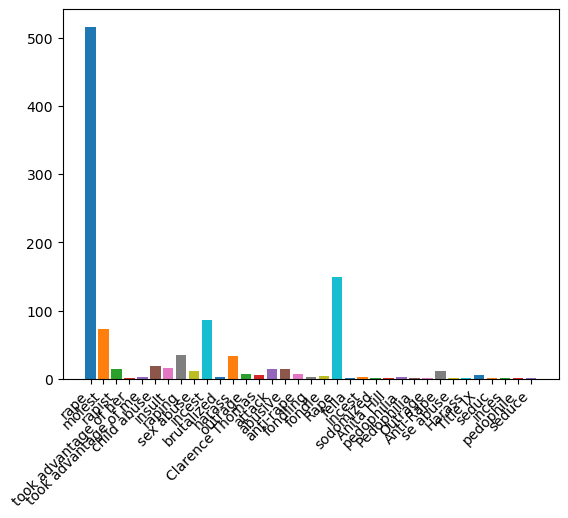

In [174]:
frequency_stats(loop_keywords(rape_regex, rape_dataframe))




RAPE HITS
AM: But they didn't, they didn't think I should have answered him back, you see. Well anyway, there was struggles all the time, white men trying to molest us all the time, you had no peace from white men. I remember my brother, this was a brother, my father's son by a previous marriage, he went and got with the boss's son at the big sawmill, who had insulted me. That was an insult for a white man to say he wanted you, that was an insult, you see.
3 ['insult', 'insult', 'insult']
AM: I had about eight, you know, from the different marriages. And he married my mother... My father's father was a white man. His mother had been raped, you see, on the plantation, And so he was the son of a white man. CG: Now what was his name? AM: My father was St. Cyr Moore. Father was a very handsome man, about six feet tall, and broad shouldered, very powerful man, powerfully built, very good looking, extremely good looking. And I understood that he married my mother more out of spite than any

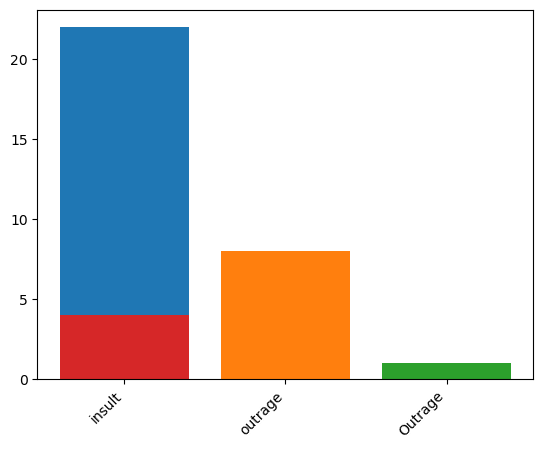

In [175]:
def productivity(keyword_regex):  
    num_true_hit = 0
    num_false_hit = 0
    num_total_events = 0

    true_keywords_list = []
    false_keywords_list = []
    print("\n")
    
    print("RAPE HITS")
    for label, content in rape_dataframe.items(): 
        if label == 'Interview Text': 
            for c in content: 
                keyword_hits_per_event = re.findall(keyword_regex, c) #re.IGNORECASE?? 
                num_keyword_hits_per_event = len(keyword_hits_per_event)
                num_total_events +=1
                if num_keyword_hits_per_event > 0: 
                    print(c)
                    print(num_keyword_hits_per_event, keyword_hits_per_event)  
                    num_true_hit += 1
                    for keyword in keyword_hits_per_event:              
                        true_keywords_list.append(keyword)  
                
    
    print("\n")
    print("SEXUAL HARASSMENT HITS")
    for label, content in sexual_harassment_dataframe.items(): 
        if label == 'Interview Text': 
            for c in content: 
                keyword_hits_per_event = re.findall(keyword_regex, c) #re.IGNORECASE?? 
                num_keyword_hits_per_event = len(keyword_hits_per_event)
                num_total_events +=1
                if num_keyword_hits_per_event > 0: 
                    #print(c)
                    print(num_keyword_hits_per_event, keyword_hits_per_event)  
                    num_true_hit += 1
                    for keyword in keyword_hits_per_event:              
                        true_keywords_list.append(keyword)    
    print(true_keywords_list)
    print("\n")
    print("FALSE HITS")
    for label, content in false_hits_dataframe.items(): 
        if label == 'Interview Text': 
            for c in content: 
                keyword_hits_per_event = re.findall(keyword_regex, c) #re.IGNORECASE?? 
                num_keyword_hits_per_event = len(keyword_hits_per_event)
                num_total_events +=1
                if num_keyword_hits_per_event > 0: 
                    #print(c)
                    print(num_keyword_hits_per_event, keyword_hits_per_event)  
                    num_false_hit += 1
                    for keyword in keyword_hits_per_event:              
                        false_keywords_list.append(keyword) 
    
    print("\n")
    num_true_and_false_hits = num_true_hit + num_false_hit
    print("STATS")
    percent_true_event = (num_true_hit/num_true_and_false_hits)*100
    print("True Hits: " + str(num_true_hit))
    print("False Hits: " + str(num_false_hit)) 
    print("Num Events: " + str(num_total_events))
    print("Percent: True/Event: " + str(percent_true_event) + "%") 
    
    if percent_true_event >= 20.0: 
        print("PRODUCTIVE")
    else: 
        print("NOT PRODUCTIVE")  
  
    print("\n")
    print("FREQUENCY STATS - TRUE HITS")
    frequency_stats(true_keywords_list)

    print("\n")
    print("FREQUENCY STATS - FALSE HITS")
    frequency_stats(false_keywords_list)
    
productivity(insult_outrage_regex)
                    

RAPE KEYWORD HITS IN RAPE EVENTS
frequency stats for each word
rape 516
molest 73
rapist 14
took advantage of her 1
took advantage of me 3
child abuse 19
insult 16
raping 35
sex abuse 11
incest 87
brutalized 3
harass 33
outrage 7
Clarence Thomas 5
attack 15
abusive 14
anti-rape 7
fondling 3
fondle 4
Rape 150
fella 1
Incest 3
sodomized 1
Anita Hill 2
pedophilia 3
Pedophilia 1
Outrage 1
Anti-Rape 12
se abuse 1
Harass 1
Title IX 5
seduc 1
inces 1
pedophile 2
seduce 1


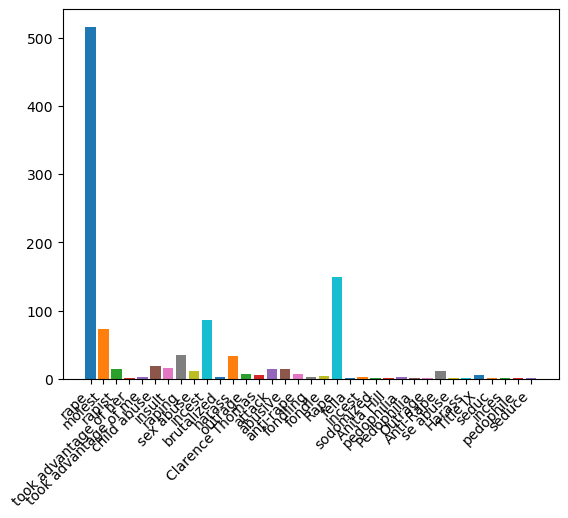

In [176]:
#frequency_stats(loop_keywords(sexual_harassment_regex, false_hits_dataframe))
print("RAPE KEYWORD HITS IN RAPE EVENTS")
frequency_stats(loop_keywords(rape_regex, rape_dataframe))


    

SEXUAL HARASSMENT KEYWORD HITS IN SEXUAL HARASSMENT EVENTS
frequency stats for each word
molest 9
harass 82
sexual harassment 119
sexually harass 16
sex harass 2
Sexual harassment 3
sexually inappropriate 2
Harass 1
felt me up 2
hanky-panky 1
sex abuse 1
pinched 2
seduce 1


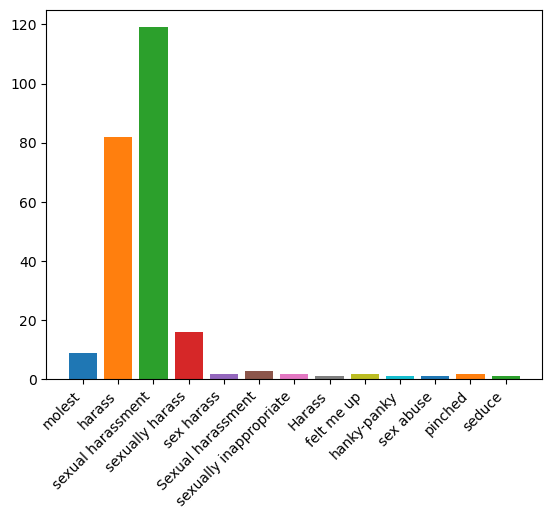

In [177]:
print("SEXUAL HARASSMENT KEYWORD HITS IN SEXUAL HARASSMENT EVENTS")
frequency_stats(loop_keywords(sexual_harassment_regex, sexual_harassment_dataframe))

SEXUAL HARASSMENT KEYWORD HITS IN RAPE EVENTS
frequency stats for each word
molest 73
sex abuse 11
ravis 2
harass 19
sexual harassment 13
sexually harass 1
sexually abusive 1
abusive 13
fondle 4
exposed himself 2
Sexual Harassment 1
seduc 1
seduce 1


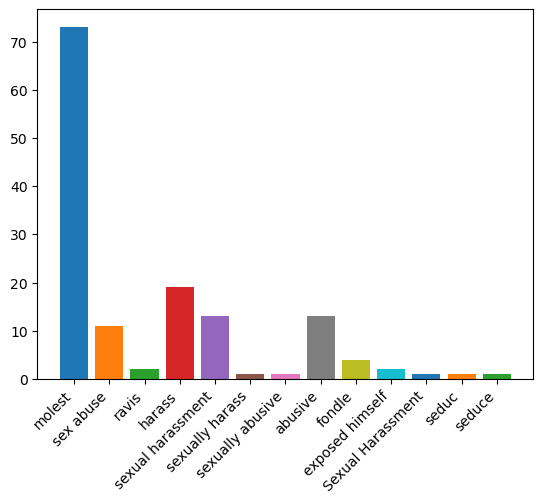

In [179]:
print("SEXUAL HARASSMENT KEYWORD HITS IN RAPE EVENTS")
frequency_stats(loop_keywords(sexual_harassment_regex, rape_dataframe))

RAPE KEYWORD HITS IN SEXUAL HARASSMENT EVENTS
frequency stats for each word
molest 9
harass 222
Clarence Thomas 18
Anita Hill 18
raping 1
insult 6
attack 1
rape 17
child abuse 3
rapist 3
sexually inappropriate 2
Harass 1
took advantage of me 1
hanky panky 3
pinch 1
sodomized 1
Rape 19
Anti-Rape 10
sex abuse 1
pinched 2
Title IX 5
outrage 1
Playboy 1
seduce 1


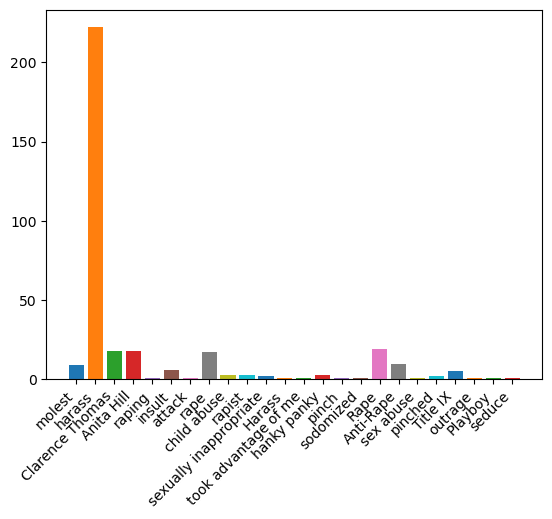

In [178]:
print("RAPE KEYWORD HITS IN SEXUAL HARASSMENT EVENTS")
frequency_stats(loop_keywords(rape_regex, sexual_harassment_dataframe))



RAPE HITS
Speaker 2: A person, I separate the person from the crime, and I tell jurors to do that. This person is a human being and they are afforded the dignity of a human being. The crime can be the most heinous thing in the world. I've had hate crimes where people have killed, you know multiple people. I've had people, I've seen maybe as a prosecutor or even as a judge, where people have done rape and murder and, and various other things and children are involved. But you still separate the crime from the person. And you're not here to judge the person, you're here to judge the crime. And that's what I try to impress upon the jurors. Speaker 1: Okay, okay. Speaker 2: And that's what I mean by that. Story_ID: 1316 Speaker 1: All right, all right. Let's see, well with what would have been some of the, I guess the memorable cases that have come before you as a Superior Court Judge? Can you talk about those? Speaker 2: Well a lot of mine, cause they were murder cases, they are on appe

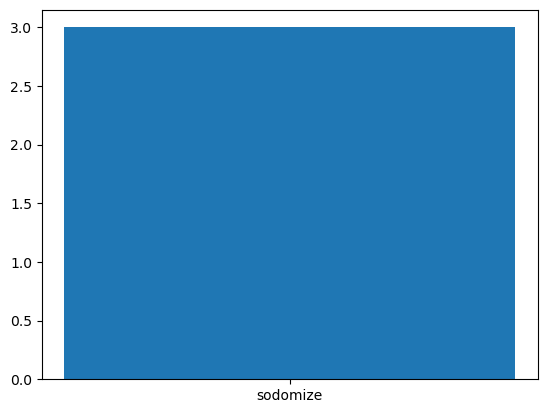

In [166]:
productivity(sodomy_regex)



RAPE HITS
Coming on further, I stopped over in Japan, that was the time it was occupied by the United States Army, and of course I didn't like the looks of it and was so pleased when that occupation ended. When it ended a few years later, I was invited by the U.S. Department of...well, AID, that's what they called it then...to go with a group of Indian women to Japan to see the extension services that they had developed, and they had done an outstanding good job in this whole field of extension. They had already had some programs along this line, in kind of a neighborhood way, but they had it much more organized, the government was in back of it. And the thing that impressed me the most was that I lived in the homes of the Japanese people and that's when you really learn a great deal. Having tea, seeing how well they took care of their children again, and I saw absolutely no child abuse, just none, no child abuse whatsoever. The children were loved and cared for, and they were helped

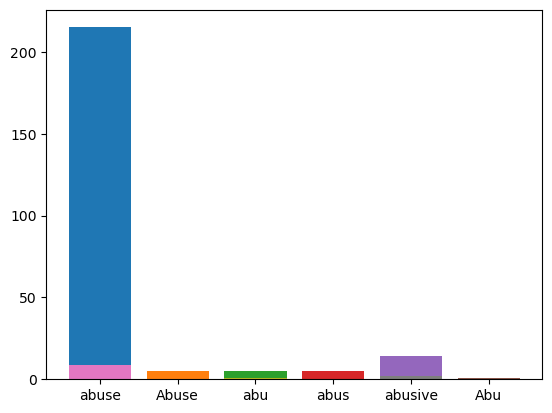

In [168]:
productivity(abusive_regex)



RAPE HITS
BEAL: In 1998, a number of black people from around the country had become concerned with the Million Man March, the attack on Anita, um ... ROSS: Hill. BEAL: ... Hill, around the ... it was really a bad attack on her. ROSS: Clarence Thomas. BEAL: Yeah. And it was around the Clarence Thomas nomination. And it threw right back into the black movement of all stripes, How are you going to deal with these questions of women's oppression and exploitation in the context of, you've got, you know, an anti-racist struggle going on. And more than anything else, I think that if black people are suffering today from the rulings of Clarence Thomas ... and they are ... a lot of it has to do with their refusal to take up Anita Hill's exposure of him as a sexual abuser. And had they taken that a little bit more seriously, they would recognize that black faces in high places is not something that's going to resolve the problems that black women are facing today, nor that other people of col

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

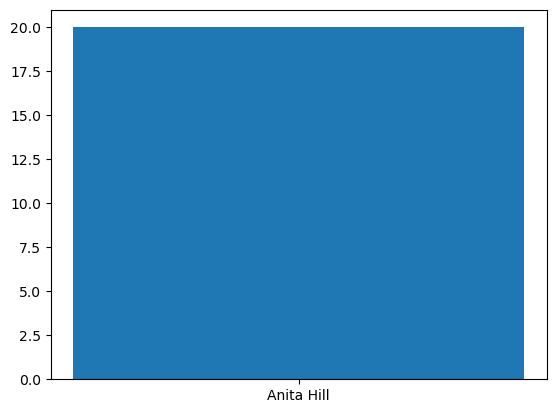

In [170]:
productivity(anita_hill_regex)

In [ ]:
productivity(clarence_thomas_regex)



RAPE HITS
AM: But they didn't, they didn't think I should have answered him back, you see. Well anyway, there was struggles all the time, white men trying to molest us all the time, you had no peace from white men. I remember my brother, this was a brother, my father's son by a previous marriage, he went and got with the boss's son at the big sawmill, who had insulted me. That was an insult for a white man to say he wanted you, that was an insult, you see.
3 ['insult', 'insult', 'insult']
AM: I had about eight, you know, from the different marriages. And he married my mother... My father's father was a white man. His mother had been raped, you see, on the plantation, And so he was the son of a white man. CG: Now what was his name? AM: My father was St. Cyr Moore. Father was a very handsome man, about six feet tall, and broad shouldered, very powerful man, powerfully built, very good looking, extremely good looking. And I understood that he married my mother more out of spite than any

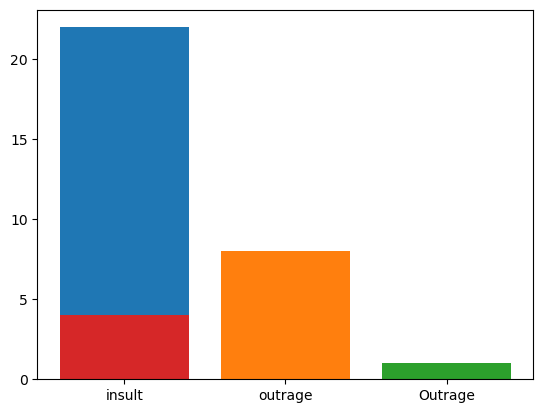

In [171]:
productivity(insult_outrage_regex )



RAPE HITS
I was not as active on the local level, but I joined NOW and all those good old great ones and became a real advocate for not just social workers, but women in those positions, women in the field. So that&#8217;s been my focus all these years. I&#8217;m a very verbal person, and so I made lots of speeches when I was with-the next program that I worked in in Child and Family was the Project Against Sexual Abuse of Appalachian Children. So that included, as I shared with you on the phone, I think, that agency had sort of a research project that started with setting up a helpline in 1979. The helpline was for women and children to call in and report just to the helpline or just to talk about their abuse, primarily sexual abuse was the target. And that meant any women that had been sexually abused as a child or were still or had been raped or a child that had been molested or somehow been offended sexually. So that sort of experiment or, in research terms, sort of out there to 

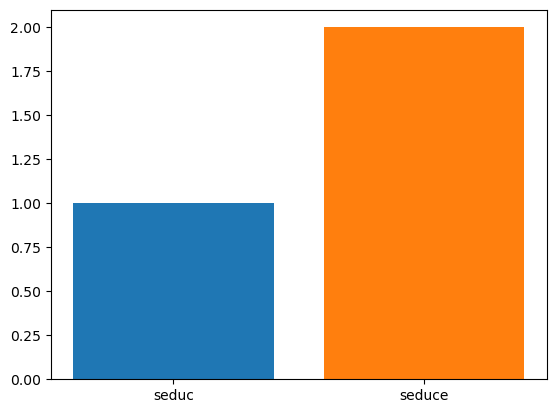

In [172]:
productivity(seduction_regex )

array([0, 1, 2, 3, 4, 5])

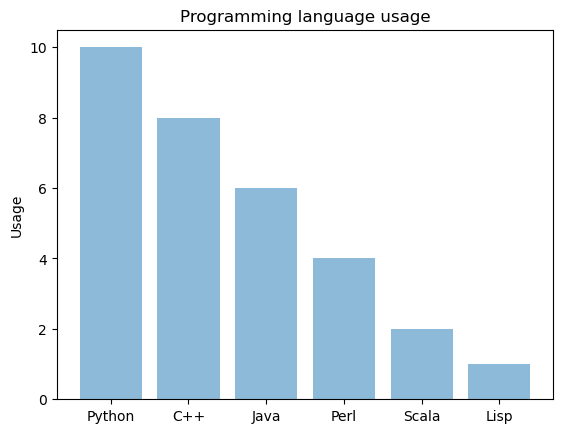

In [158]:
#PRODUCTIVITY OF GRAY AREA KEYWORDS 



ladies_man_regex = write_regex('ladies man,lady''s man') #CHECK 

abusive_keywords = 'abuse,abused,abusive,abus*'
abusive_regex = write_regex(abusive_keywords)

playboy_keywords = 'playboy,playboy magazine,Playboy Bunny,playboy bunnies'
playboy_regex = write_regex(playboy_keywords) 

anita_hill_regex = write_regex('Anita Hill') 
clarence_thomas_regex = write_regex('Clarence Thomas')

insult_outrage_regex = write_regex('insult,outrage,insult*,outrag*') 
seduction_regex = write_regex('seduce,seduction,seduc*')
anti_rape_regex = write_regex('anti-rape')

